## Machine Learning

In [1]:
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


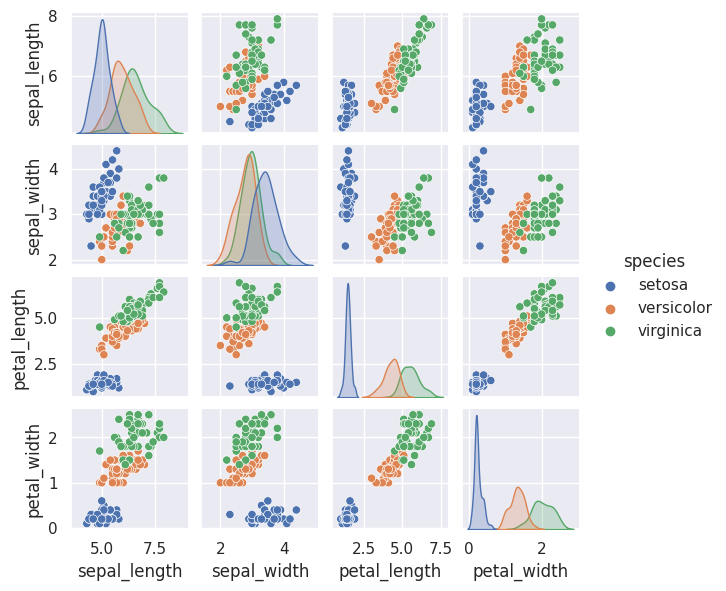

In [3]:
sns.set()
sns.pairplot(iris, hue="species", height=1.5)

In [4]:
X_iris = iris.drop(columns="species")
X_iris.shape

(150, 4)

In [5]:
y_iris = iris["species"]
y_iris.shape

(150,)

### Scikit-Learn Estimator API
- Consistency
- Inspection
- Limited object hierarchy
- Composition
- Sensible defaults

**Reference:** https://arxiv.org/abs/1309.0238

### Simple Linear Regression

In [6]:
import matplotlib.pyplot as plt
import numpy as np

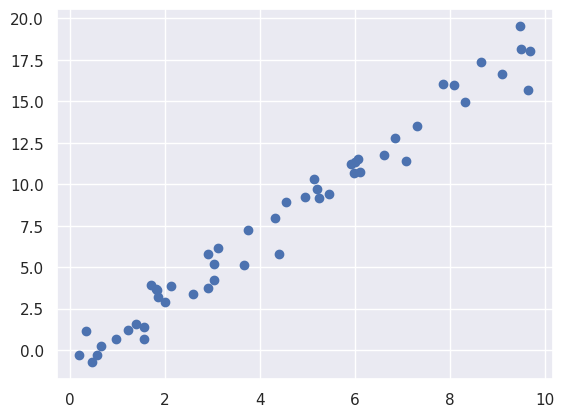

In [7]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y) 

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [10]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [12]:
model.fit(X, y)

LinearRegression()

In [13]:
# 斜率
model.coef_

array([1.9776566])

In [14]:
# 截距
model.intercept_

-0.9033107255311146

In [15]:
xfit = np.linspace(-1, 11)

In [16]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

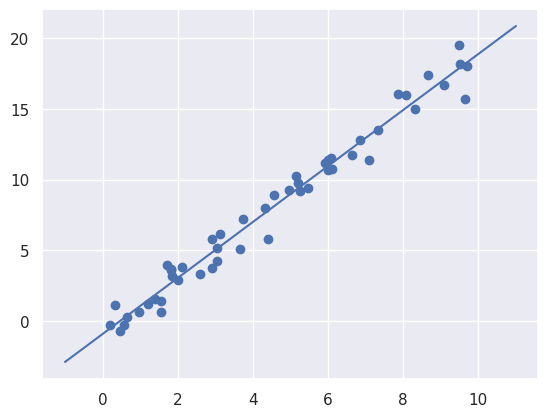

In [17]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

#### 統計學塑模
https://www.statsmodels.org/stable/index.html

### Iris Classification

#### 監督式學習

In [18]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [19]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [20]:
# 檢視預測標籤與實際值得相符程度分數
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

#### 非監督式學習(分類)

In [21]:
# 主成分分析
from sklearn.decomposition import PCA
model = PCA(n_components=2) # 回傳2個成分
model.fit(X_iris) # 不需設定y
X_2D = model.transform(X_iris)

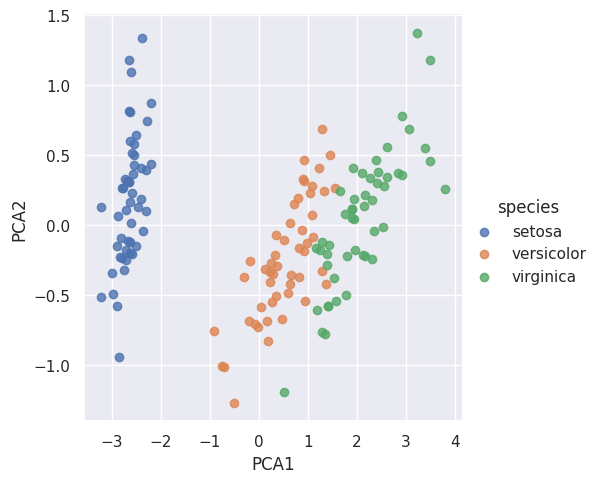

In [22]:
iris["PCA1"] = X_2D[:, 0]
iris["PCA2"] = X_2D[:, 1]
sns.lmplot(iris, x="PCA1", y="PCA2", hue="species", fit_reg=False)

#### 非監督式學習(集群)

In [23]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3,
                        covariance_type="full")
model.fit(X_iris)
y_gmm = model.predict(X_iris)

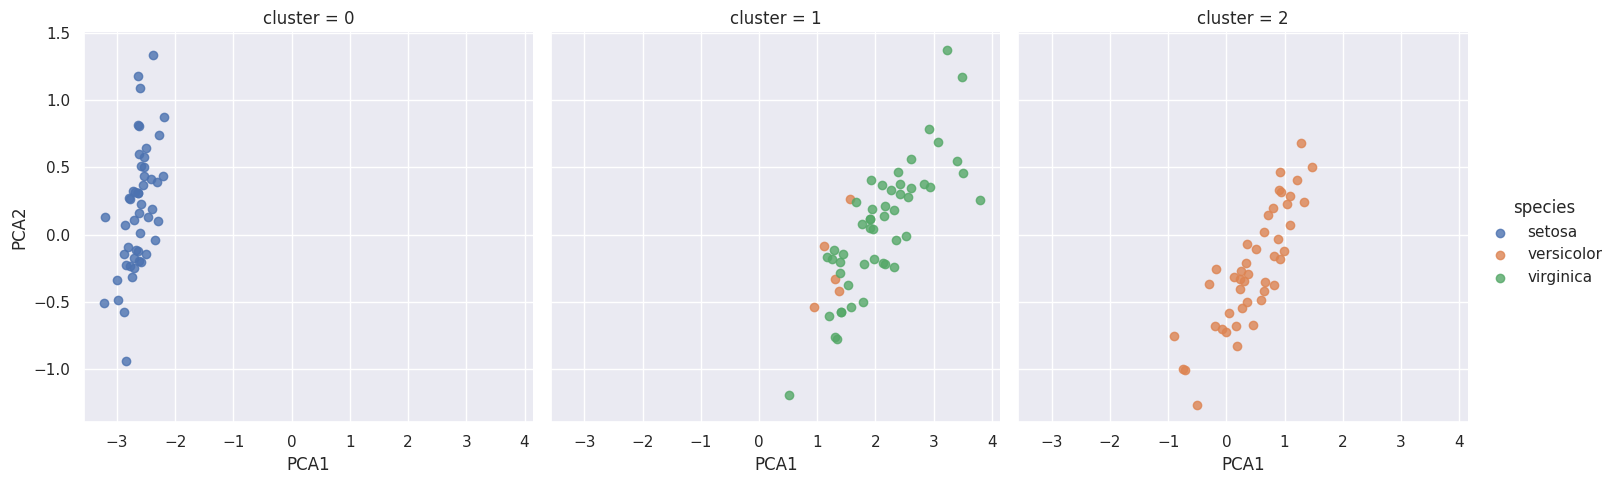

In [24]:
iris["cluster"] = y_gmm
sns.lmplot(iris, x="PCA1", y="PCA2", hue="species",
           col="cluster", fit_reg=False)

#### 手寫字元

In [25]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

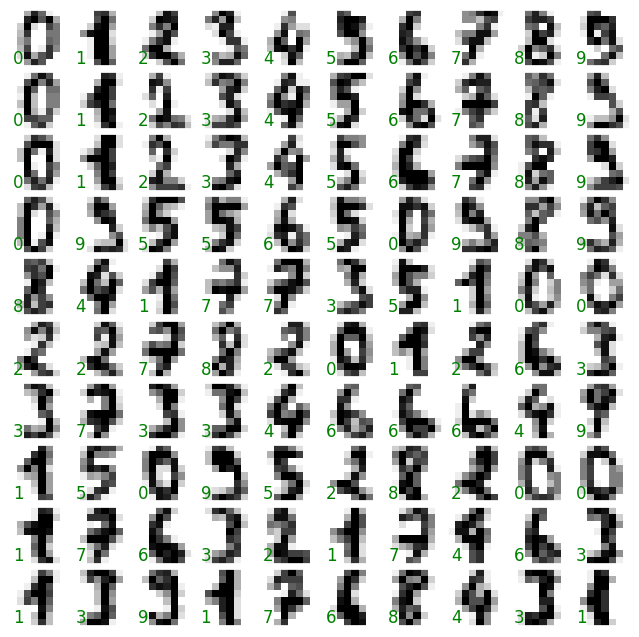

In [26]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={"xticks": [], "yticks": []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="binary", interpolation="nearest")
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color="green")

In [27]:
X = digits.data
X.shape

(1797, 64)

In [28]:
y = digits.target
y.shape

(1797,)

#### 非監督式學習

In [29]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2) # 降成2維
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

/home/lingwenpan/miniconda3/envs/data_science/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/lingwenpan/miniconda3/envs/data_science/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

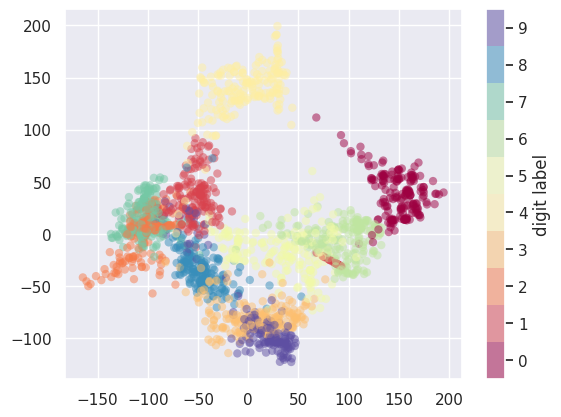

In [31]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolors="none", alpha=0.5,
            cmap=plt.get_cmap("Spectral", 10))
plt.colorbar(label="digit label", ticks=range(10))
plt.clim(-0.5, 9.5)

In [32]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [33]:
accuracy_score(ytest, y_model)

0.8333333333333334

Text(109.44999999999997, 0.5, 'true value')

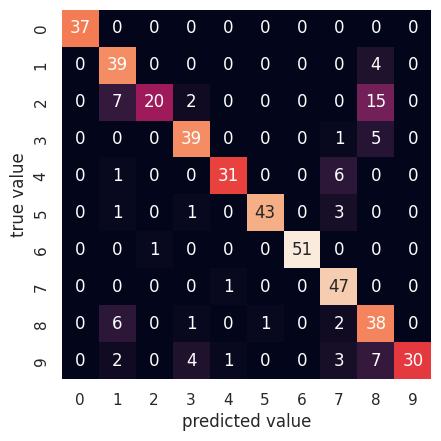

In [34]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel("predicted value")
plt.ylabel("true value")

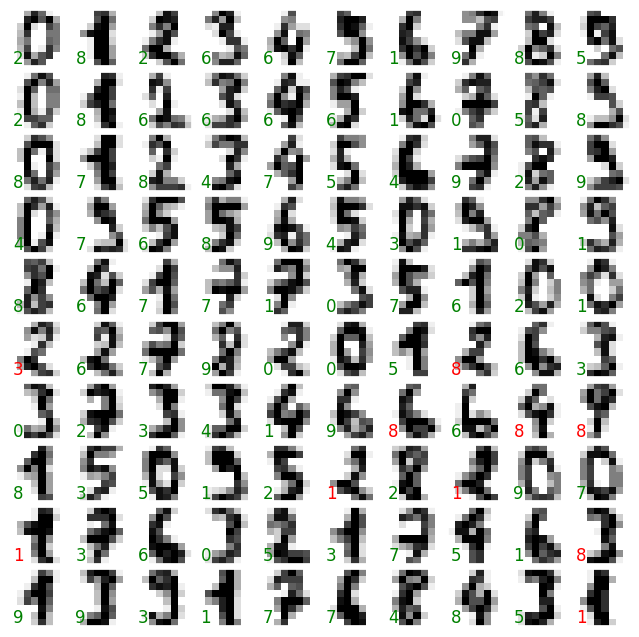

In [35]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={"xticks": [], "yticks": []},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="binary", interpolation="nearest")
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color="green" if (ytest[i] == y_model[i]) else "red")